# Network Optimization Practice
Yu Mao

## Problem 1

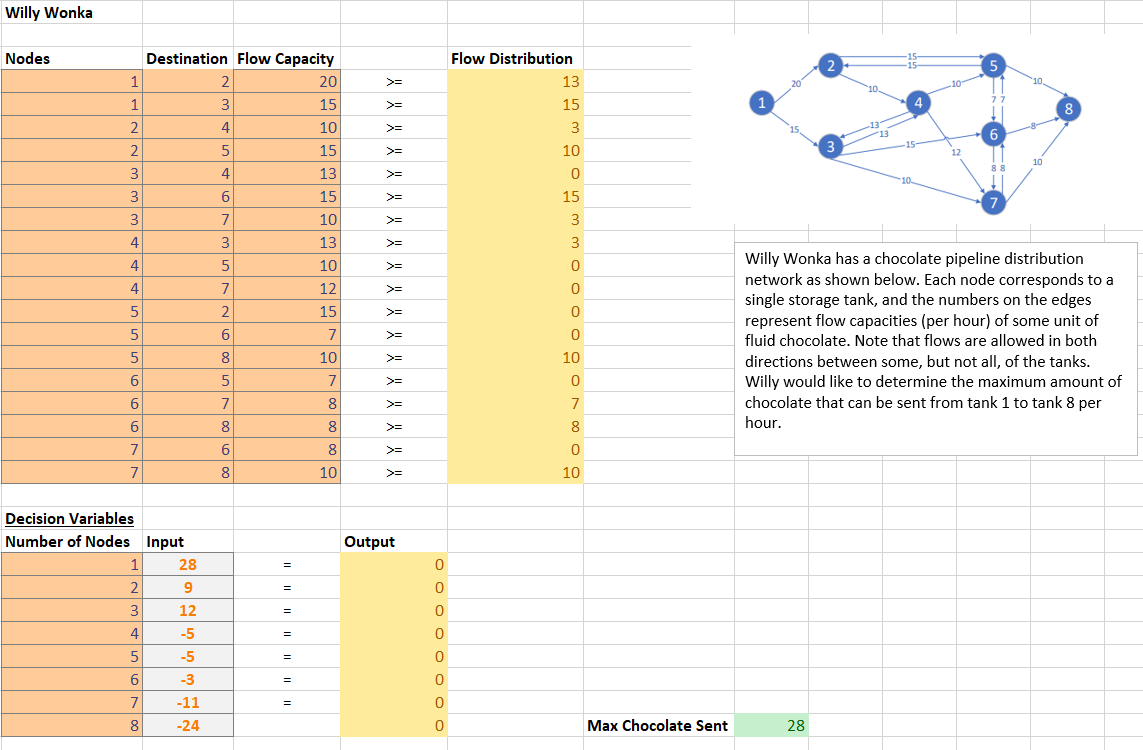

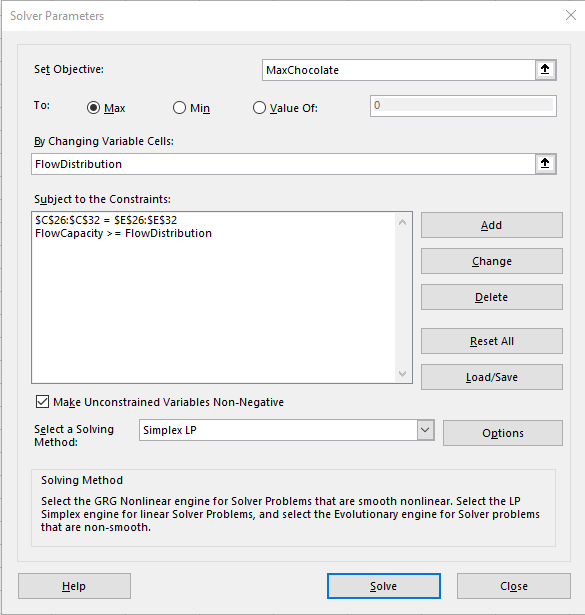

### Inputs

In [1]:
pip install bellmanford

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import bellmanford as bf

In [3]:
G = nx.Graph()

In [4]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)

### Flow Distribution

In [7]:
G = nx.DiGraph()

In [8]:
G.add_edge(1, 2, capacity = 20)
G.add_edge(1, 3, capacity = 15)
G.add_edge(2, 4, capacity = 10)
G.add_edge(2, 5, capacity = 15)
G.add_edge(3, 4, capacity = 13)
G.add_edge(3, 6, capacity = 15)
G.add_edge(3, 7, capacity = 10)
G.add_edge(4, 3, capacity = 13)
G.add_edge(4, 5, capacity = 10)
G.add_edge(4, 7, capacity = 12)
G.add_edge(5, 2, capacity = 15)
G.add_edge(5, 6, capacity = 7)
G.add_edge(5, 8, capacity = 10)
G.add_edge(6, 5, capacity = 7)
G.add_edge(6, 7, capacity = 8)
G.add_edge(6, 8, capacity = 8)
G.add_edge(7, 6, capacity = 8)
G.add_edge(7, 8, capacity = 10)

In [9]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 18
Average in degree:   2.2500
Average out degree:   2.2500


In [137]:
flow_value, flow_dict = nx.maximum_flow(G,1,8)
flow_value

28

In [138]:
print(flow_dict)

{1: {2: 19, 3: 9}, 2: {4: 4, 5: 15}, 3: {4: 0, 6: 9, 7: 0}, 4: {3: 0, 5: 2, 7: 2}, 5: {2: 0, 6: 7, 8: 10}, 6: {5: 0, 7: 8, 8: 8}, 7: {6: 0, 8: 10}, 8: {}}


### Question: 

Is there a limit to increasing the expansion factor k?

In [197]:
Output = 0
Flow = 0

In [198]:
for k in range(1, 500):
    G = nx.DiGraph()
    factor = k/10
    G.add_edge(1, 2, capacity = 20 * factor)
    G.add_edge(1, 3, capacity = 15 * factor)
    G.add_edge(2, 4, capacity = 10)
    G.add_edge(2, 5, capacity = 15)
    G.add_edge(3, 4, capacity = 13)
    G.add_edge(3, 6, capacity = 15)
    G.add_edge(3, 7, capacity = 10)
    G.add_edge(4, 3, capacity = 13)
    G.add_edge(4, 5, capacity = 10)
    G.add_edge(4, 7, capacity = 12)
    G.add_edge(5, 2, capacity = 15)
    G.add_edge(5, 6, capacity = 7)
    G.add_edge(5, 8, capacity = 10 * factor)
    G.add_edge(6, 5, capacity = 7)
    G.add_edge(6, 7, capacity = 8)
    G.add_edge(6, 8, capacity = 8 * factor)
    G.add_edge(7, 6, capacity = 8)
    G.add_edge(7, 8, capacity = 10 * factor)
    flow_value, flow_dict = nx.maximum_flow(G, 1, 8)
    print("Factor k = %.1f, Flow Distribution = %d" % (factor,flow_value))
    
    if flow_value > Flow:
        Flow = flow_value
        Output = factor
    else:
        print("Maximum flow distribution = %d and factor k = %.1f" % (Flow,Output))
        break

if Output == 500:
    print("We have no maximum.")



Factor k = 0.1, Flow Distribution = 2
Factor k = 0.2, Flow Distribution = 5
Factor k = 0.3, Flow Distribution = 8
Factor k = 0.4, Flow Distribution = 11
Factor k = 0.5, Flow Distribution = 14
Factor k = 0.6, Flow Distribution = 16
Factor k = 0.7, Flow Distribution = 19
Factor k = 0.8, Flow Distribution = 22
Factor k = 0.9, Flow Distribution = 25
Factor k = 1.0, Flow Distribution = 28
Factor k = 1.1, Flow Distribution = 30
Factor k = 1.2, Flow Distribution = 33
Factor k = 1.3, Flow Distribution = 36
Factor k = 1.4, Flow Distribution = 39
Factor k = 1.5, Flow Distribution = 42
Factor k = 1.6, Flow Distribution = 44
Factor k = 1.7, Flow Distribution = 47
Factor k = 1.8, Flow Distribution = 50
Factor k = 1.9, Flow Distribution = 53
Factor k = 2.0, Flow Distribution = 55
Factor k = 2.1, Flow Distribution = 56
Factor k = 2.2, Flow Distribution = 58
Factor k = 2.3, Flow Distribution = 59
Factor k = 2.4, Flow Distribution = 61
Factor k = 2.5, Flow Distribution = 62
Factor k = 2.6, Flow Distrib

The limit to increasing the expansion factor k is 2.5.

## Problem 2

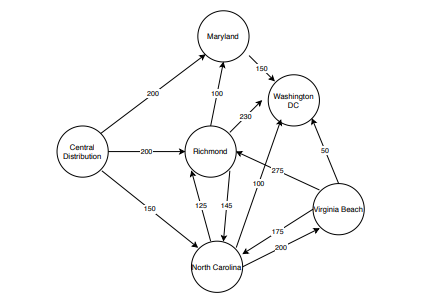

In [139]:
G.clear()

In [140]:
G.add_node("Central Distribution")
G.add_node("Maryland")
G.add_node("Richmond")
G.add_node("North Carolina")
G.add_node("Washington DC")
G.add_node("Virginia Beach") 

In [141]:
G.add_edge("Central Distribution", "Maryland", capacity = 200)
G.add_edge("Central Distribution","Richmond", capacity = 200)
G.add_edge("Central Distribution", "North Carolina", capacity = 150)

G.add_edge("Maryland", "Washington DC", capacity = 150)

G.add_edge("Richmond", "Maryland", capacity = 100)
G.add_edge("Richmond", "Washington DC", capacity = 230)
G.add_edge("Richmond", "North Carolina", capacity = 145)

G.add_edge("North Carolina", "Richmond", capacity = 125)
G.add_edge("North Carolina", "Washington DC", capacity = 100)
G.add_edge("North Carolina", "Virginia Beach", capacity = 200)

G.add_edge("Virginia Beach", "North Carolina", capacity = 175)
G.add_edge("Virginia Beach", "Richmond", capacity = 275)
G.add_edge("Virginia Beach", "Washington DC", capacity = 50)

In [142]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 6
Number of edges: 13
Average in degree:   2.1667
Average out degree:   2.1667


In [143]:
flow_value, flow_dict = nx.maximum_flow(G,"Central Distribution","Washington DC")
flow_value

500

In [144]:
print(flow_dict)

{'Central Distribution': {'Maryland': 150, 'Richmond': 200, 'North Carolina': 150}, 'Maryland': {'Washington DC': 150}, 'Richmond': {'Maryland': 0, 'Washington DC': 230, 'North Carolina': 0}, 'North Carolina': {'Richmond': 30, 'Washington DC': 100, 'Virginia Beach': 20}, 'Washington DC': {}, 'Virginia Beach': {'North Carolina': 0, 'Richmond': 0, 'Washington DC': 20}}


### Questions
1. Will Washington DC be able to receive the 500 containers of product by the end of the day? If not, how many containers can Jenny tell the Washington DC store they will receive?

    Yes. Washington DC will be able to receive the 500 containers of product by the end of the day. Given the calculation by flow_value, the number is exactly 500 if it chooses the shortest path. 

2. What is the plan for transporting the products?

    According to the print(flow_dict) below, Central Distribution should request 150 containers to Maryland, 150 to North Carolina, and 200 to Richmond. Maryland should request 150 to Washington DC. Richmond should request 0 to Maryland, 0 to North Carolina, and 230 to Washington DC. Virginia Beach should request 0 to North Carolina, 0 to Richmond, and 20 to Washington DC. North Carolina shuold request 30 to Richmond, 20 to Virginia Beach, and 100 to Washington DC. 

3. What approach did you take to solve this problem?

    I used the Fold-Fulkerson algoithm to solve the problem. 


## Problem 3

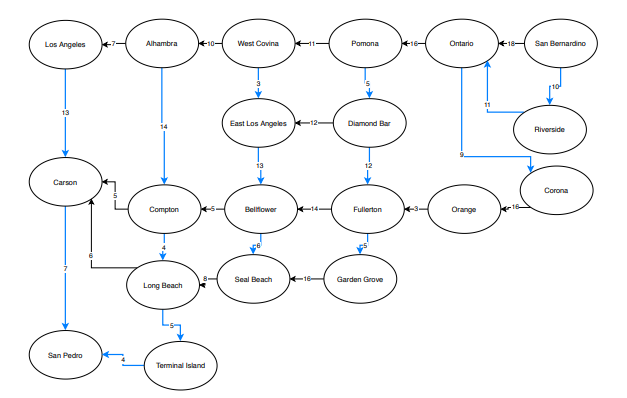

In [173]:
G.clear()

In [174]:
G.add_node("Los Angeles")
G.add_node("Alhambra")
G.add_node("West Covina")
G.add_node("Pomona")
G.add_node("Ontario")
G.add_node("San Bernardino") 
G.add_node("Riverside")
G.add_node("Corona")
G.add_node("Orange")
G.add_node("Fullerton")
G.add_node("Bellflower")
G.add_node("Compton") 
G.add_node("Carson")
G.add_node("East Los Angeles")
G.add_node("Diamond Bar")
G.add_node("Long Beach")
G.add_node("Seal Beach")
G.add_node("Garden Grove") 
G.add_node("San Pedro")
G.add_node("Terminal Island") 

In [175]:
list1 =[("San Bernardino","Ontario",18),
        ("San Bernardino", "Riverside", 10),
        ("Ontario", "Pomona",16),
        ("Ontario", "Corona", 9),
        ("Pomona", "Diamond Bar", 5),
        ("Pomona", "West Covina", 11),
        ("West Covina", "East Los Angeles",3),
        ("West Covina", "Alhambra", 10),
        ("Alhambra", "Compton", 14),
        ("Alhambra", "Los Angeles", 7),
        ("Los Angeles", "Carson", 13),
        
        ("Riverside", "Ontario", 11),
        ("Diamond Bar", "East Los Angeles", 12),
        ("Diamond Bar", "Fullerton", 12),
        ("East Los Angeles", "Bellflower", 13),
        
        ("Corona", "Orange", 16),
        ("Orange", "Fullerton",3),
        ("Fullerton", "Bellflower",14),
        ("Fullerton", "Garden Grove",5),
        ("Bellflower", "Seal Beach", 6),
        ("Bellflower", "Compton", 5),
        ("Compton", "Long Beach", 4),
        ("Compton", "Carson", 5),
        ("Carson", "San Pedro", 7),
        ("Garden Grove", "Seal Beach", 16),
        ("Seal Beach", "Long Beach",8),
        ("Long Beach", "Terminal Island",5),
        ("Long Beach", "Carson",6),
        ("Terminal Island","San Pedro",4)]


In [177]:
G.add_weighted_edges_from(list1)

In [178]:
print(nx.dijkstra_path(G, "San Bernardino", "San Pedro"))

['San Bernardino', 'Ontario', 'Corona', 'Orange', 'Fullerton', 'Bellflower', 'Compton', 'Carson', 'San Pedro']


In [180]:
list2 =[("San Bernardino","Ontario",18*40),
        ("San Bernardino", "Riverside", 10 *25),
        ("Ontario", "Pomona",16*40),
        ("Ontario", "Corona", 9*25),
        ("Pomona", "Diamond Bar", 5*25),
        ("Pomona", "West Covina", 11*40),
        ("West Covina", "East Los Angeles",3*25),
        ("West Covina", "Alhambra", 10*40),
        ("Alhambra", "Compton", 14*25),
        ("Alhambra", "Los Angeles", 7*40),
        ("Los Angeles", "Carson", 13*25),
        
        ("Riverside", "Ontario", 11*25),
        ("Diamond Bar", "East Los Angeles", 12*40),
        ("Diamond Bar", "Fullerton", 12*25),
        ("East Los Angeles", "Bellflower", 13*25),
    
        ("Corona", "Orange", 16*40),
        ("Orange", "Fullerton",3*40),
        ("Fullerton", "Bellflower",14*40),
        ("Fullerton", "Garden Grove",5*25),
        ("Bellflower", "Seal Beach", 6*25),
        ("Bellflower", "Compton", 5*40),
        ("Compton", "Long Beach", 4*25),
        ("Compton", "Carson", 5*40),
        ("Carson", "San Pedro", 7*25),
    
        ("Garden Grove", "Seal Beach", 16*40),
        ("Seal Beach", "Long Beach",8*40),
        ("Long Beach", "Terminal Island",5*25),
        ("Long Beach", "Carson",6*40),
        ("Terminal Island","San Pedro",4*25)]


In [181]:
G.add_weighted_edges_from(list2)

In [182]:
print(nx.dijkstra_path(G, "San Bernardino", "San Pedro"))

['San Bernardino', 'Riverside', 'Ontario', 'Pomona', 'West Covina', 'East Los Angeles', 'Bellflower', 'Compton', 'Long Beach', 'Terminal Island', 'San Pedro']


1. What route should Ker take to minimize the distance traveled between San Bernardino and San Pedro?

    Ker should take San Bernardino, Ontario, Corona, Orange, Fullerton, Bellflower, Compton, Carson, and San Pedro to minimize the distance between San Bernardino and San Pedro

2. Suppose that Ker’s average speed on East-West routes is 25 mph, while the North-South routes (in blue) average 40 mph. What route should Ker take to minimize the travel time?
    
    Ker should go to San Bernardino, then Riverside, Ontario, Pomona, West Covina, East Los Angeles, Bellflower, Compton, Long Beach, Terminal Island, and San Pedro to minimize the travel time. 

3. What approach did you take to solve the problem?

    I used the dijkstra algoithm to solve the problem. 